# Introduction

**Concurrency** - the act of having your computer do multiple things at the same time. There are many benefits to doing this, but can lead to issues. So it is important to understand these and utilize them where appropriate.

There are 3 basic types of concurrency available in python:
1. threading
2. asyncio (introduced in Python 3.4)
3. multiprocessing

## Background

Once asyncio was introduced we then saw **async** and **await** added in Python 3.5 - eventually becoming keywords in 3.7 version.

The **asyncio.run()** function was added as well.

Originally, some of the samples used here were only tested in Python 3.8.5 but I will be running 3.10.2 version.

Things you will need to know for this:
- be proficient in python
- understand classes, functions, iteration
- created a few python projects
- experience with async in any language (bonus)

## Setup

### Cloud Workspace

In the GitHub repo [here](https://github.com/LinkedInLearning/async-python-foundations-applied-concepts-2422322), there is a way to run the code in VS Code via the browser with [Gitpod](https://gitpod.io/#/https://github.com/LinkedInLearning/async-python-foundations-applied-concepts-2422322). Otherwise can download locally.

### Local Setup

The process if you were doing locally would be:

1. clone the repo

2. cd into the course directory

3. create a virtual environment to keep dependencies isolated then activate
```python
python3 -m venv venv
source venv/bin/activate
```

... or you can follow [this](https://github.com/ProsperousHeart/cheatsheets/blob/master/Processes/virtualenvs.md)

4. install requirements:  `pip install -r requirements.txt`

5. ensure you have [redis](https://redis.io/download) installed (can use `brew install redis` if you utilize that package)

# Understanding Asynchronous Programs

## [sync vs async](https://www.linkedin.com/learning/async-python-foundations-applied-concepts/what-makes-programs-slow-and-when-async-execution-can-help?autoSkip=true&autoplay=true&resume=false&u=76276956)

With async, you can only optimize things you can walk away from.

Async conurrency prevents "too many cooks in the kitchen".

### I/O Bound vs CPU Bound

#### I/O Bound

Likely to benefit from async:

- HTTP requests
- database access
- persistent connections (sockets, WebSockets)
- sending emails
- network & API calls

It makes the call, and while waiting for a response it can do other things.

#### CPU Bound

Likely not to benefit from async:

- heavy arithmetic operations
- image processing
- slow algorithms
- parsing
- string manipulation

Would need to be split up into a few processes or threads.

## [Async/Await](https://www.linkedin.com/learning/async-python-foundations-applied-concepts/how-async-works-async-await?autoSkip=true&autoplay=true&resume=false&u=76276956)

The **event loop** is at the heart of asynchronous programming. It manages tasks using what's called the **event queue** - also known as the task queue.

Since Python 3.5 we've had async/await syntax. It allows us to write async code that ready synchronously.

### Code Example 1

#### Synchronous Code Example 1

```python
def sync_function(secs):
    ...
    results = blocking_function()
    return results
```

#### Async Code Example 1

```python
async def function(secs):
    ...
    results = await non_blocking_awaitable()
    return results
```

### Code Example 2

When defining an **async** function we can then **await** another function. And just like functions can call others, you can similarly chain async functions.

#### Synchronous Code Example 2

```python
def sync_function():
    ...
    results = blocking_function()
    return results
```

#### Async Code Example 2

```python
# chaining
async def my_function():
    ...
    results = await non_blocking_awaitable()
    return results

async def another_function():
    results = await my_function()  # when called, we get an awaitable
    return results
```

**Rule of thumb:** only get an awaitable from within an async function. That function then becomes something you can await.

## [How async Python differs from other languages](https://www.linkedin.com/learning/async-python-foundations-applied-concepts/how-async-python-differs-from-other-languages?autoSkip=true&autoplay=true&resume=false&u=76276956)

[David Beazley](https://www.dabeaz.com/) wrote some rules for async Python, but the following were suggested by the course creator:

1. async Python does not run itself

2. we can only **Await** from an **async** function

3. awaiting something does not magically make it async

### Rule 1:  async Python does not run itself

```python
async def my_func(argument):
    ... 
    await something()

my_function()
```

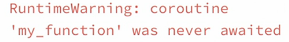

You cannot run this code as if it were regular code. You must explicitly hand over control to the event loop.

```python
import asyncio

async def my_function(argument):
    ... 
    await something()
    
asyncio.run(my_function())
```

There are other ways of handling execution to the event loop, but this is the most straightforward.

### Rule 2:  we can only await from an async function

```python
def my_func(argument):
    ...
    await something()

my_func()
```


### Rule 3:  awaiting something does not magically make it async

If you take a blocking API and add await to it, it won't turn into a non-blocking API.

## [Async sleep & gather](https://www.linkedin.com/learning/async-python-foundations-applied-concepts/async-sleep-and-gather?autoSkip=true&autoplay=true&resume=false&u=76276956)

# Additional Resources
Here are some of the resources I utilized for creating thsi training.
1. LinkedIn Learning
    - [Async Python Foundations:  Applied Concepts](https://www.linkedin.com/learning/async-python-foundations-applied-concepts) - be sure to check out the GitHub repo [here](https://github.com/LinkedInLearning/async-python-foundations-applied-concepts-2422322)!
    - [Faster Python Code](https://www.linkedin.com/learning/faster-python-code)
    - [Optimizing Python Services](https://www.linkedin.com/learning/faster-python-services)
    - [Python 3.10 First Look](https://www.linkedin.com/learning/python-3-10-first-look/)
2. From RealPython
    - [Speed Up Your Python Program With Concurrency](https://realpython.com/python-concurrency/) (an article) - be sure to check out [their GitHub repo](https://github.com/realpython/materials/tree/master/concurrency-overview)!
    - [Speed Up Python With Concurrency](https://realpython.com/courses/speed-python-concurrency/) (a video course)